In [131]:
import pandas as pd

In [132]:
claims_df = pd.read_csv('../IBM_Debater_(R)_CE-EMNLP-2015.v3/current_working_dataset/claims.csv')
claims_df

,Topic,Claim original text,Claim corrected version
0,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,exposure to violent video games causes at leas...
1,This house believes that the sale of violent v...,video game violence is not related to serious ...,video game violence is not related to serious ...
2,This house believes that the sale of violent v...,some violent video games may actually have a p...,some violent video games may actually have a p...
3,This house believes that the sale of violent v...,exposure to violent video games causes both sh...,exposure to violent video games causes both sh...
4,This house believes that the sale of violent v...,Violent video games increase the violent tende...,they increase the violent tendencies among youth
...,...,...,...
2289,This house would enforce term limits on the le...,"Term limits won't affect gridlock, being a qui...","Term limits won't affect gridlock, being a qui..."
2290,This house would enforce term limits on the le...,Limiting terms deprives voters of the right to...,Limiting terms deprives voters of the right to...
2291,This house would enforce term limits on the le...,The lack of mandatory limits to tenure is rega...,the lack of mandatory limits to tenure as a da...
2292,This house would enforce term limits on the le...,contact with the affairs of state is one of th...,contact with the affairs of state is one of th...


In [133]:
evidence_df = pd.read_csv('../IBM_Debater_(R)_CE-EMNLP-2015.v3/current_working_dataset/evidence.csv')
evidence_df.columns = ["Topic", "Claim original text", "Evidence", "Type of Evidence Information"]

In [134]:
from collections import OrderedDict
import numpy as np

def factorize_dataframe(dataframe, cols_to_factorize):
   
    master_list = []

    # Step 1: Iterate over cols to factorize    
    for col in cols_to_factorize:
        
        # Step 2: add all the values to a master storage list
        master_list = master_list + dataframe[col].to_list()
    
    # Optional: Take the set of all the entries to eliminate duplicates
    master_list = list(OrderedDict.fromkeys(master_list))
    
    master_dict = {}
    
    # Step 3: create a mapping
    for i, value in enumerate(master_list):
        master_dict[value] = i
        
    for col in cols_to_factorize:
        dataframe[f"{col}_factorized"] = dataframe[col].apply(lambda row: master_dict[row])
    
    return dataframe

     
evidence_df_factorized = factorize_dataframe(evidence_df, ["Claim original text", "Evidence"]) 

In [135]:
evidence_df_factorized.head(50)


,Topic,Claim original text,Evidence,Type of Evidence Information,Claim original text_factorized,Evidence_factorized
0,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,A 2001 study found that exposure to violent vi...,[STUDY],0,1369
1,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,The most recent large scale meta-anlysis-- exa...,[STUDY],0,1370
2,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,One study did find an increase in reports of b...,[STUDY],0,1371
3,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,when one combines all relevant empirical studi...,[STUDY],0,1372
4,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,Research published in 2001 suggested that viol...,[STUDY],0,1373
5,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,In 2004 the American Psychological Association...,"[STUDY, EXPERT]",0,1374
6,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,Craig Anderson has conducted meta-analysis of ...,"[STUDY, EXPERT]",0,1375
7,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,"On November 22, 1997, thirteen-year-old Noah W...",[ANECDOTAL],0,1376
8,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,"On April 20, 1999, 18-year-old Eric Harris and...",[ANECDOTAL],0,1377
9,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,"In April 2000, 16-year-old Spanish teenager Jo...",[ANECDOTAL],0,1378


In [138]:
evidence_df_factorized_topic_0 = evidence_df_factorized.loc[evidence_df_factorized["Topic"].str.contains("This house believes that the sale of violent video games to minors should be banned")]
evidence_df_factorized_topic_0_claim_0 = evidence_df_factorized_topic_0.loc[evidence_df_factorized_topic_0["Claim original text_factorized"] <= 1000]

In [139]:
evidence_df_factorized_topic_0_claim_0

,Topic,Claim original text,Evidence,Type of Evidence Information,Claim original text_factorized,Evidence_factorized
0,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,A 2001 study found that exposure to violent vi...,[STUDY],0,1369
1,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,The most recent large scale meta-anlysis-- exa...,[STUDY],0,1370
2,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,One study did find an increase in reports of b...,[STUDY],0,1371
3,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,when one combines all relevant empirical studi...,[STUDY],0,1372
4,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,Research published in 2001 suggested that viol...,[STUDY],0,1373
...,...,...,...,...,...,...
429,This house believes that the sale of violent v...,computer games cause violence,Fox News reported that Montreal shooting case ...,[ANECDOTAL],55,1509
430,This house believes that the sale of violent v...,computer games cause violence,"In the 1999 Columbine shootings, violent video...",[ANECDOTAL],55,1510
431,This house believes that the sale of violent v...,A correlation between violent content conveyed...,Several studies show a correlation between vio...,[STUDY],56,1508
432,This house believes that the sale of violent v...,A correlation between violent content conveyed...,Fox News reported that Montreal shooting case ...,[ANECDOTAL],56,1509


In [163]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
G = nx.Graph()

In [165]:
G = nx.from_pandas_edgelist(evidence_df_factorized_topic_0_claim_0, source='Evidence_factorized', target='Claim original text_factorized', edge_attr=True, create_using=nx.DiGraph())

color_map = []

for node in G:
    if node <= max(evidence_df_factorized["Claim original text_factorized"].to_list()):
        color_map.append("blue")
    else:
        color_map.append("green")


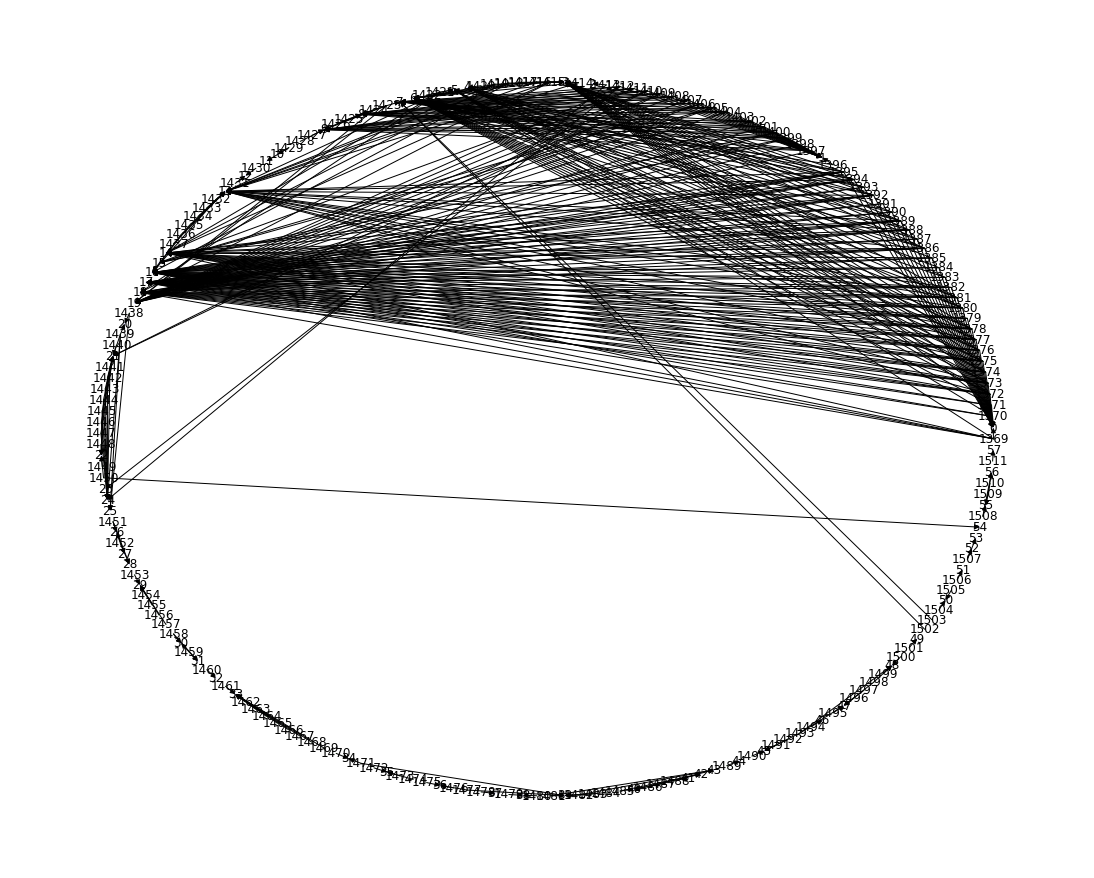

In [166]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_circular(G, with_labels=True, node_color=color_map, node_size=.005)

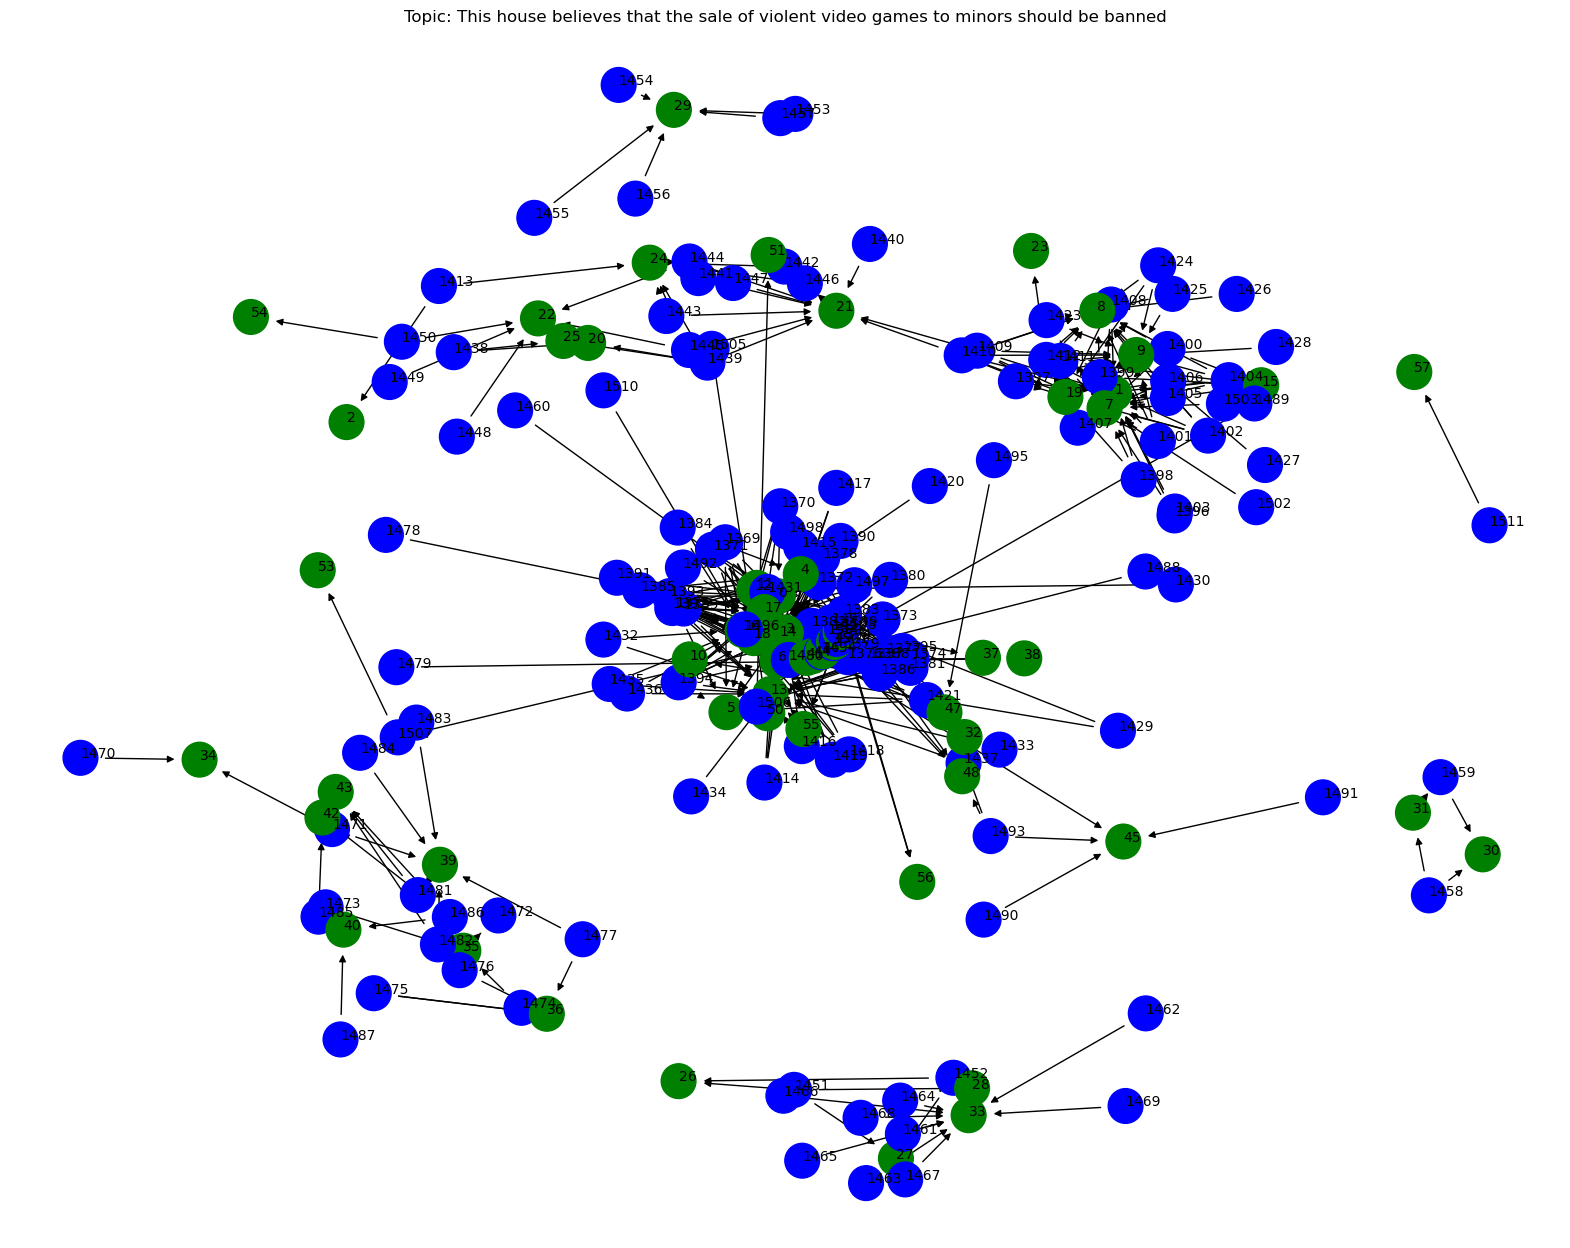

In [270]:
import igraph as ig
import matplotlib.pyplot as plt

g = ig.Graph()

tuple_list = []

for i, row in evidence_df_factorized_topic_0_claim_0.iterrows():
    tup = (row["Evidence_factorized"], row["Claim original text_factorized"])
    tuple_list.append(tup)
    
Gm = ig.Graph.TupleList(tuple_list, directed = True)

Gm.vs["label"] = Gm.vs["name"]


Gm.vs["color"] = ["green" if value <= max(evidence_df_factor
                                          
                                          ized["Claim original text_factorized"].to_list()) else "blue" for value in Gm.vs["name"]]

plt.rcParams['figure.figsize'] = [20, 16]
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots()
layout = Gm.layout("kk")
title = "This house believes that the sale of violent video games to minors should be banned"


visual_style = {}
visual_style["vertex_size"] = 25
visual_style["vertex_color"] = [x for x in Gm.vs["color"]]
visual_style["vertex_label"] = Gm.vs["name"]
#visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in Gm.es["is_formal"]]
visual_style["layout"] = layout
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 20

ig.plot(Gm, target=ax, **visual_style)
plt.title(f"Topic: {title}")
plt.axis('off');
